#  Title : Employee Attrition Analysis

In [1]:
import numpy as nm 
import pandas as pd 
import plotly as po
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### Attributes description
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Dataframe shape
df.shape

(1470, 35)

In [5]:
# columns 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Numeric Attributes
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Reassign target
# df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = False)
df['Attrition_num'] = [1 if x =='Yes' else 0 for x in df['Attrition']]

In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


In [10]:
# Drop not needed features
# (EmployeeCount, Over18, StandardHours) have only one value, and employee number is just a unique id 
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,0


### Correlation Matrix

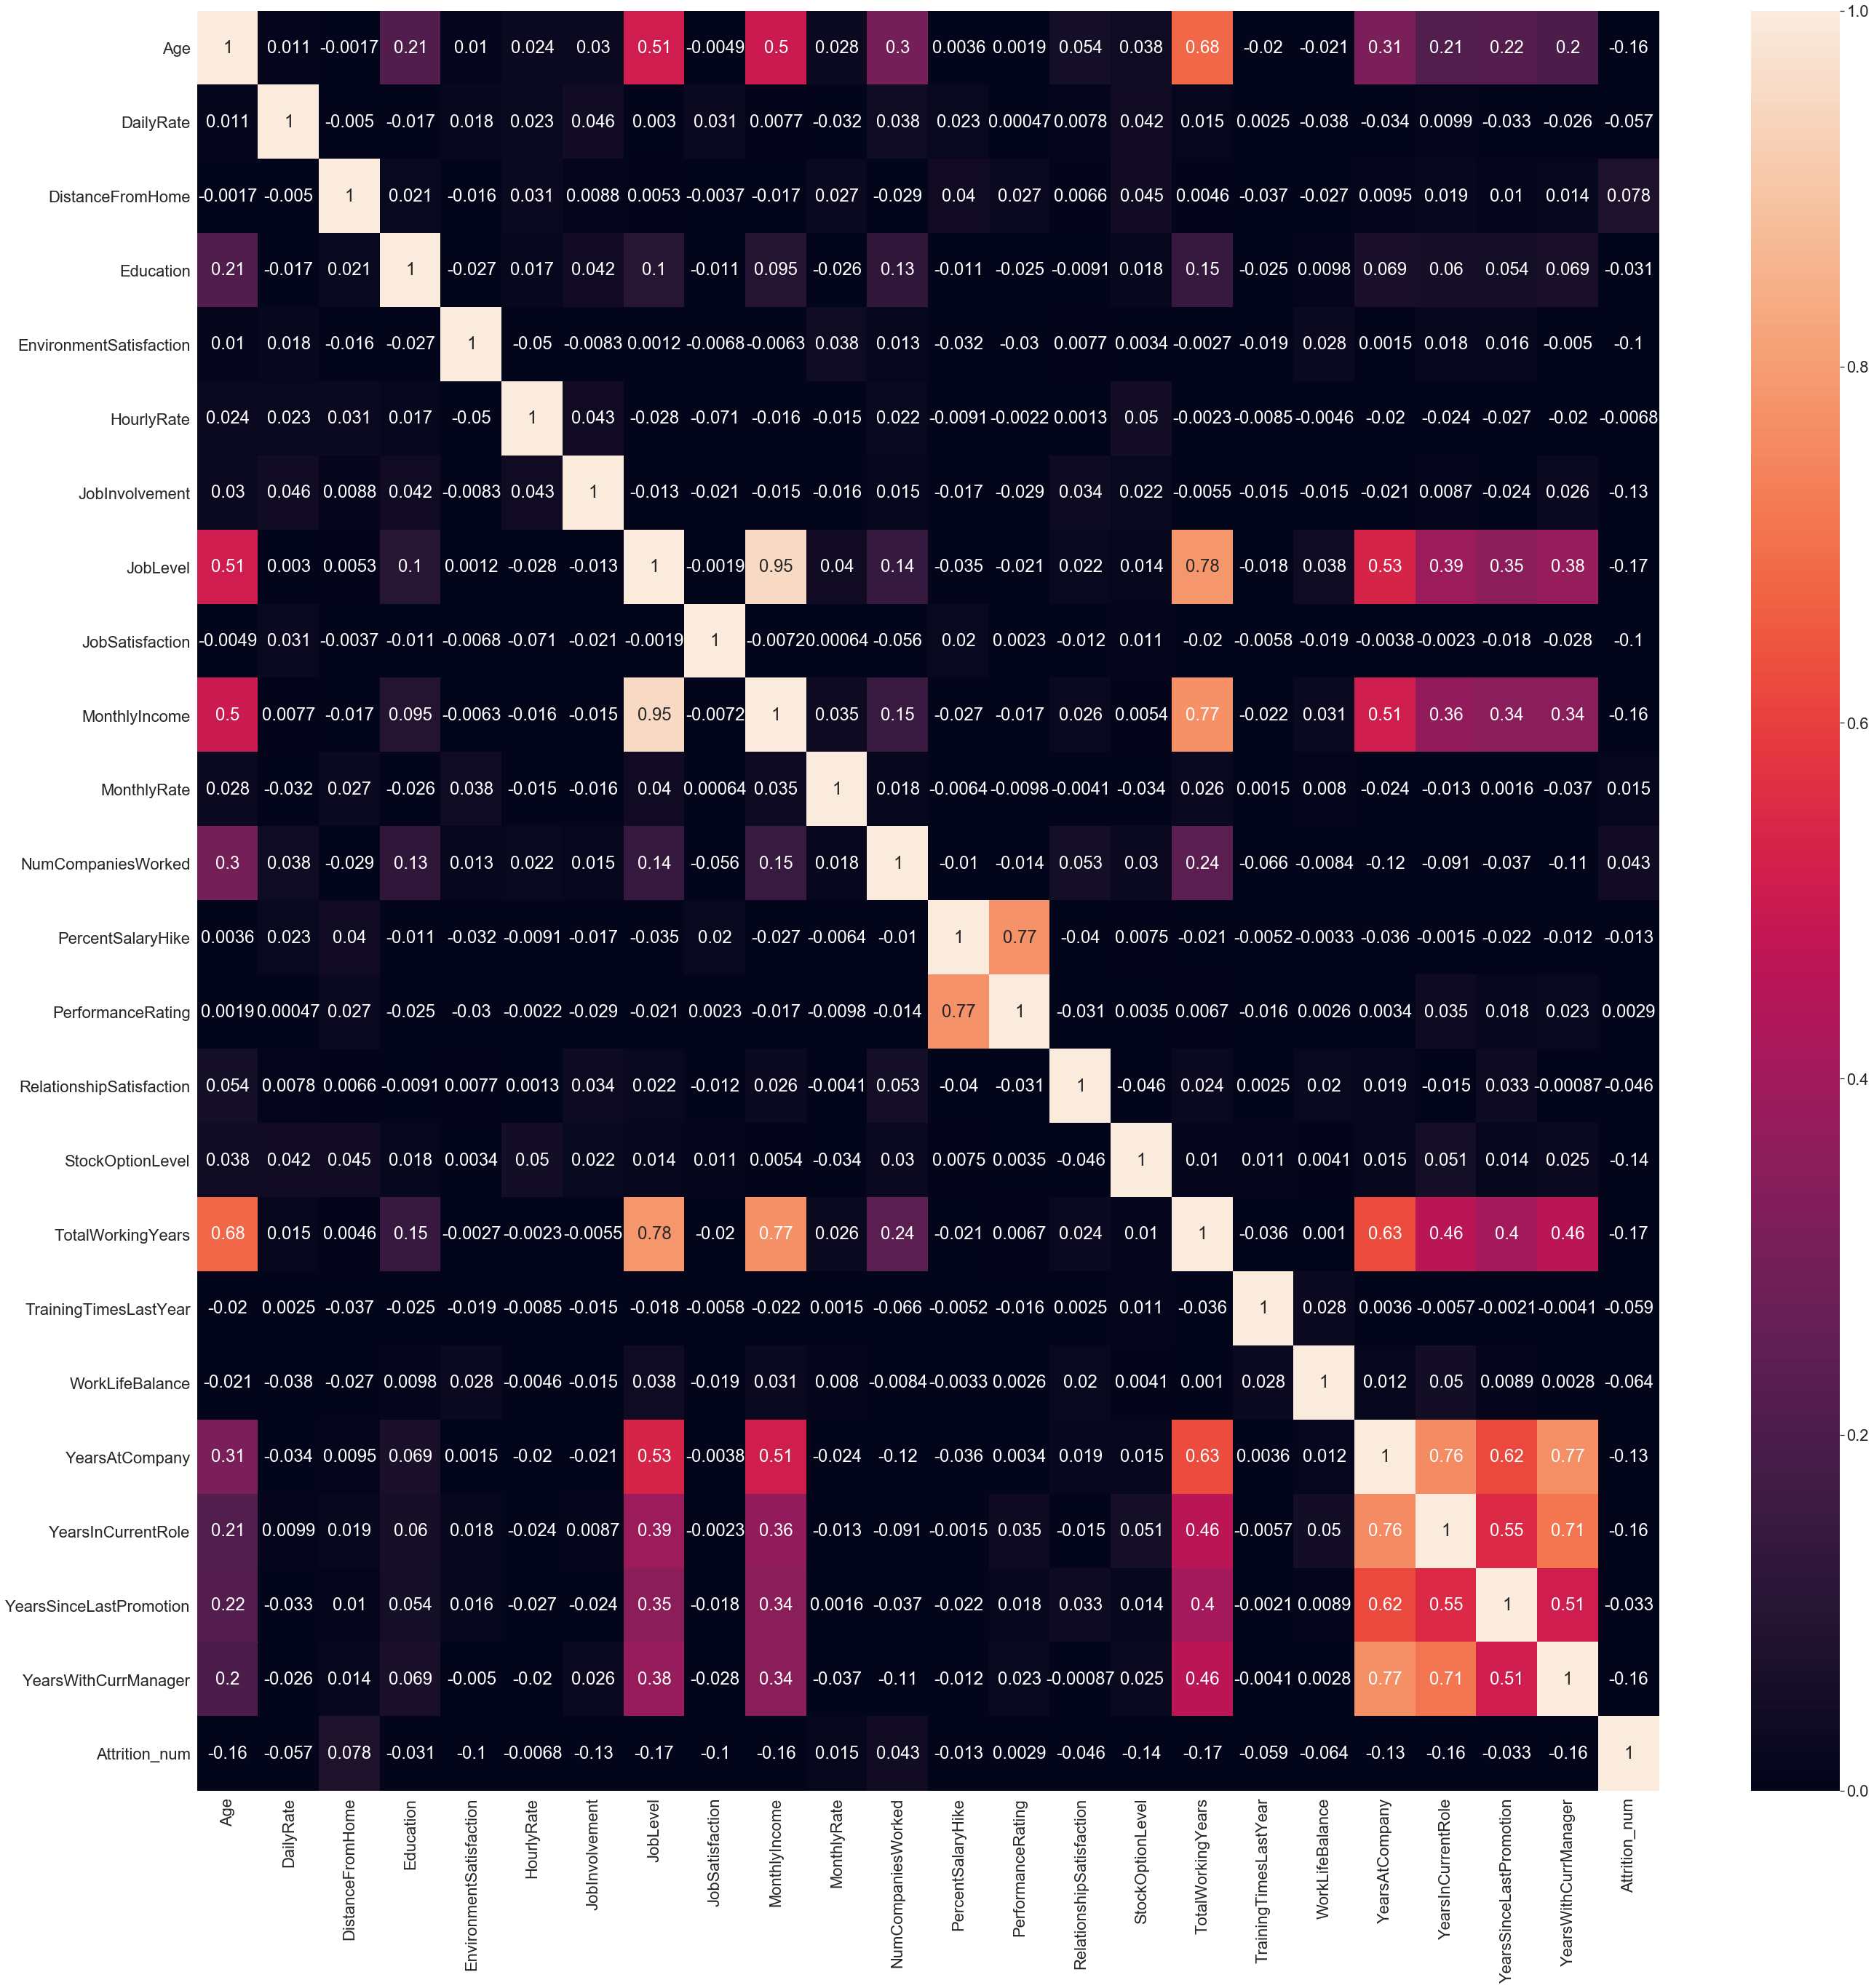

In [12]:
# Correlation Matrix 

plt.figure(figsize=(45, 45))
sns.set(font_scale=2)
sns.heatmap(df.corr(), annot=True,  vmin=0, vmax=1)
sns.set(font_scale=1)

##### We can notice different positive correlations here:
   * Job level is correlated with total working years.
   * Monthly income is highly correlated with job level. 
   * Monthly income is highly correlated with total working years.
   * Performance rating is correlated with present salary hike.
   * Years in company is correlated with years in current role and years with current manager.

### Attrition Counts

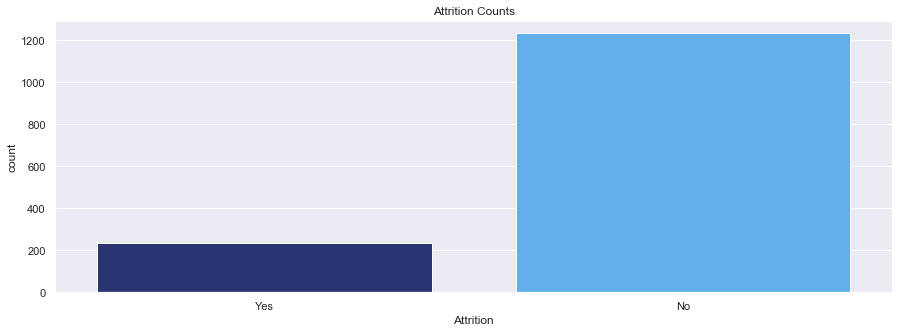

In [13]:
plt.subplots(figsize=(15,5))
plt.title('Attrition Counts')
sns.countplot(df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

In [14]:
# Counts of Attrition
df.Attrition.value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
# Percentage of Attrition
# Attrition Yes
print('Attrition Yes',(len(df[df.Attrition == 'Yes']) / len(df))*100.0)
# Attrition No
print('Attrition Yes',(len(df[df.Attrition == 'No']) / len(df))*100.0)

Attrition Yes 16.122448979591837
Attrition Yes 83.87755102040816


## How attrition is related to different factors

### Age

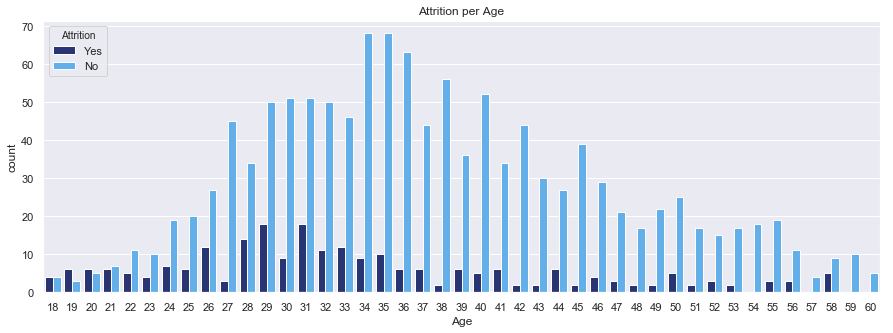

In [16]:
# Age
plt.subplots(figsize=(15,5))
plt.title('Attrition per Age')
sns.countplot(df.Age, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

* Younger ages are more likely to churn

### Department

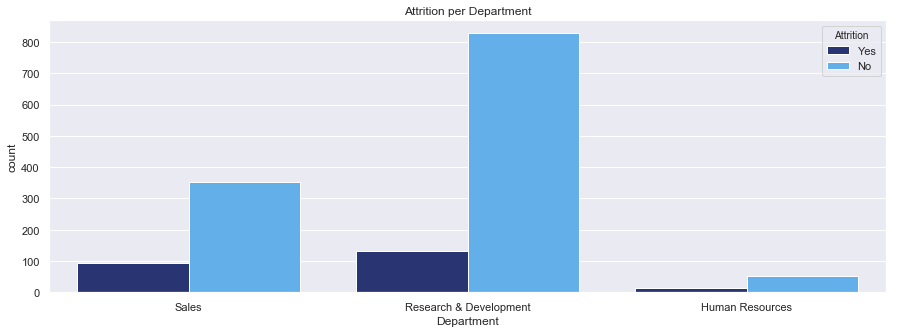

In [17]:
# Department
plt.subplots(figsize=(15,5))
plt.title('Attrition per Department')
sns.countplot(df.Department, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])


* Sales department the the biggest churn rate, where human resources have the least.

### Job role

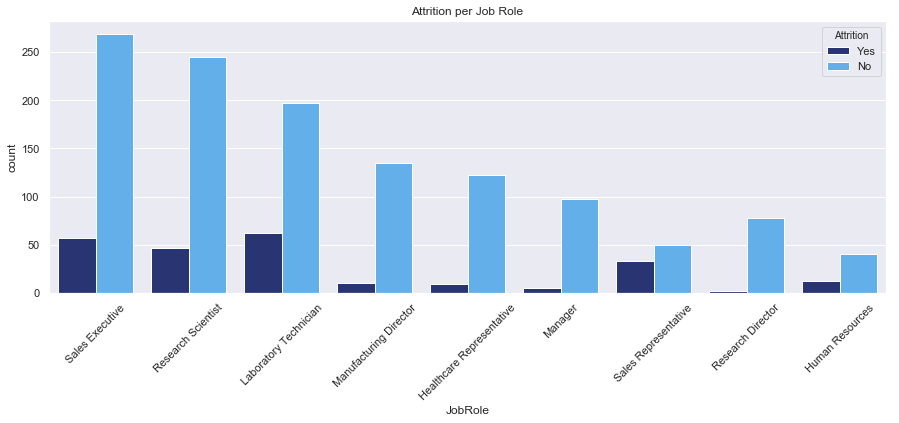

In [18]:
# Job role
plt.subplots(figsize=(15,5)) 
plt.title('Attrition per Job Role')
plt.xticks(rotation=45)
sns.countplot(df.JobRole, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])


The graph shows the attrition for different job roles, and appearently the sales representatives are more likey to churn than other roles.

### Marital status

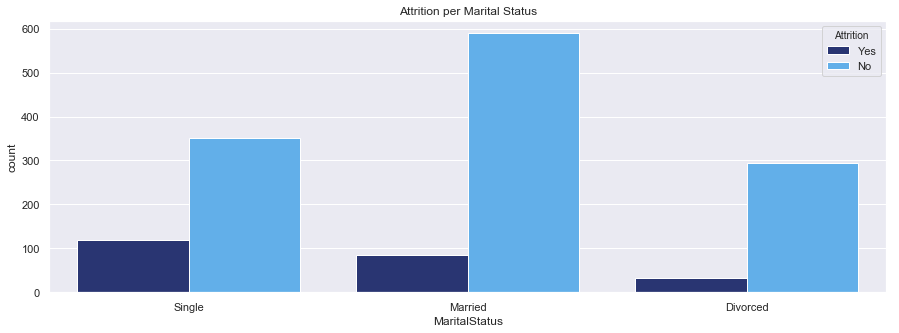

In [19]:
# Marital status
plt.subplots(figsize=(15,5))
plt.title('Attrition per Marital Status')
sns.countplot(df.MaritalStatus, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

* Looking at the graph we see that the churn percentage is higher for single employees.

### Over time

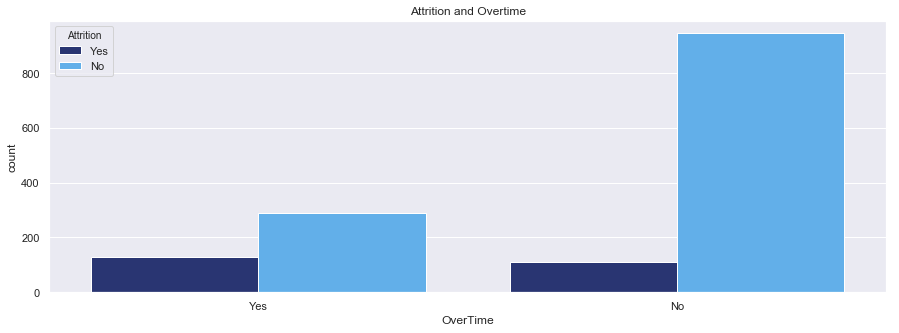

In [20]:
# overtime
plt.subplots(figsize=(15,5))
plt.title('Attrition and Overtime')
sns.countplot(df.OverTime, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

* The graph shows if the overtime is a factor for employees churn, and we can see that clearly.

### Total working years

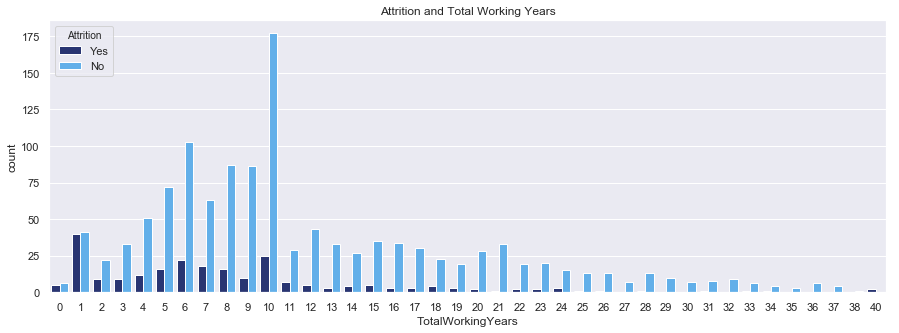

In [21]:
# Total working years
plt.subplots(figsize=(15,5))
plt.title('Attrition and Total Working Years')
sns.countplot(df.TotalWorkingYears, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

* The graph shows that people with 1 year experience are more likely to churn.

### Work life balance

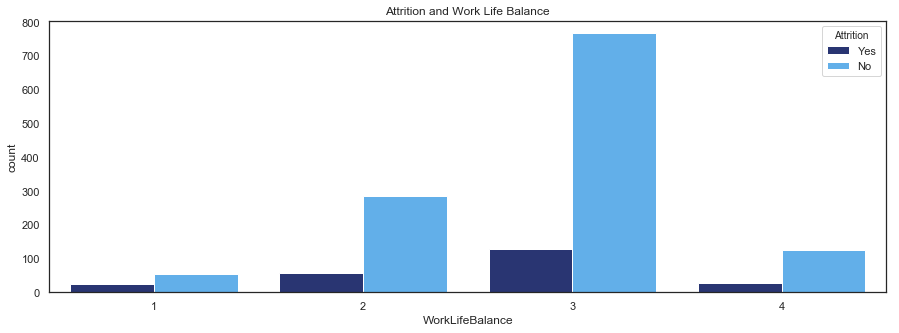

In [22]:
# Work Life Balance
sns.set_style('white') 
sns.color_palette("Set1")
plt.subplots(figsize=(15,5))
plt.title('Attrition and Work Life Balance')
sns.countplot(df.WorkLifeBalance, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff']) 

The graph shows how work life balance is related to employee churn, we can see that employees with the least score (1) are more likely to churn.

### Gender

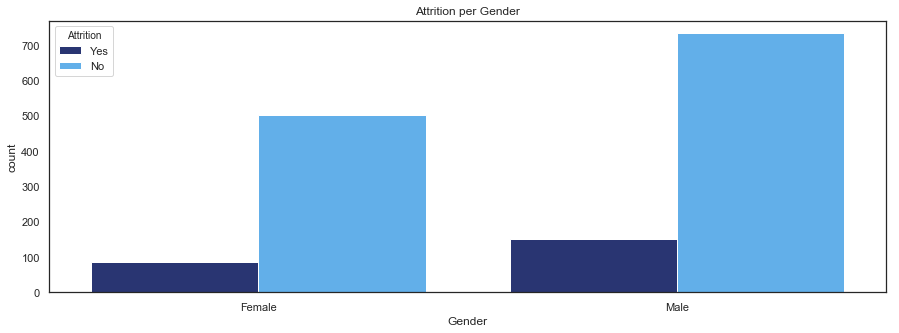

In [23]:
# Gender
plt.subplots(figsize=(15,5))
plt.title('Attrition per Gender')
sns.countplot(df.Gender, hue=df.Attrition,palette=['#1d2d7e', '#4cb2ff'])

* Males have higher churn rate, but the difference is not very significant between males an females.

### Distance From Home

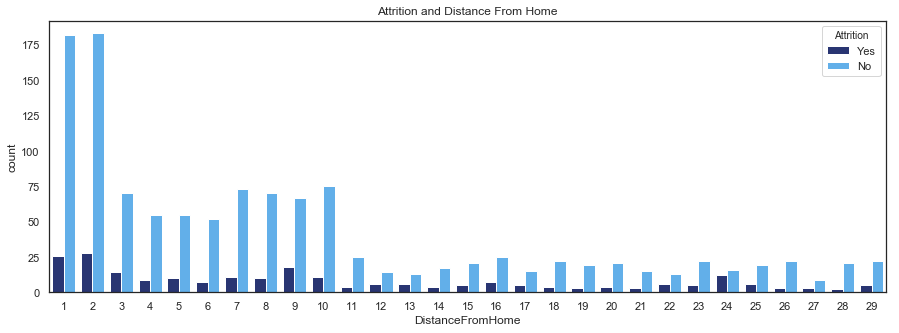

In [24]:
# DistanceFromHome
plt.subplots(figsize=(15,5))
plt.title('Attrition and Distance From Home')
sns.countplot(df.DistanceFromHome, hue=df.Attrition,palette=['#1d2d7e', '#4cb2ff'] )

* The distance from home is not an important factor as the churn rate varies between long and short distances.

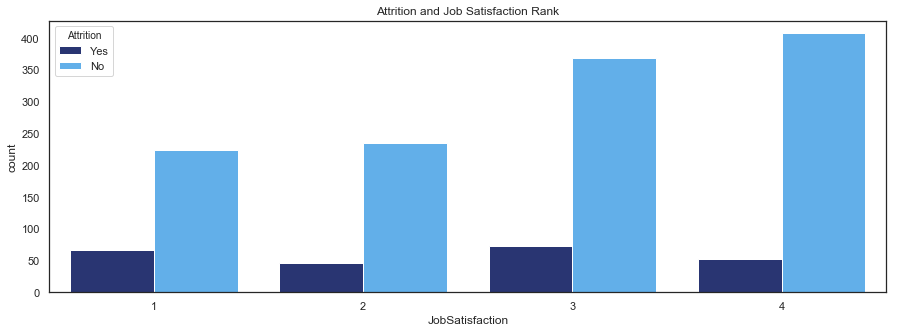

In [25]:
# JobSatisfaction
plt.subplots(figsize=(15,5))
plt.title('Attrition and Job Satisfaction Rank')
sns.countplot(df.JobSatisfaction, hue=df.Attrition, palette=['#1d2d7e', '#4cb2ff'])

* Least satisfied employees are more likely to churn but the difference is small in general. 

# Part 2 : Modeling 

In [26]:
# check missing data in each column
df.isnull().sum().sort_values(ascending=False)

Attrition_num               0
YearsWithCurrManager        0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
Age                         0
dtype: int64

In [27]:
# Transform Catagorical columns to dummies 

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [28]:
# create one hot encoding for each catagorical column ( drop one of them)

BusinessTravel = pd.get_dummies(df['BusinessTravel'],drop_first=True,prefix='BusinessTravel')
Department = pd.get_dummies(df['Department'],drop_first=True,prefix='Department')
EducationField = pd.get_dummies(df['EducationField'],drop_first=True,prefix='EducationField')
Gender = pd.get_dummies(df['Gender'],drop_first=True,prefix='Gender')
JobRole = pd.get_dummies(df['JobRole'],drop_first=True,prefix='JobRole')
MaritalStatus = pd.get_dummies(df['MaritalStatus'],drop_first=True,prefix='MaritalStatus')
OverTime = pd.get_dummies(df['OverTime'],drop_first=True,prefix='OverTime')

Attrition = pd.get_dummies(df['Attrition'],drop_first=True,prefix='Attrition')

# drop the catagorical columns ( to be replaced by the one hot encoding )
df.drop(['Attrition','Attrition_num','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)


# add the dummy columns insted of the catagorical vairbles ( one hot encoding)
df = pd.concat([df,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition],axis=1)

df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scienti

In [29]:
df['Attrition_Yes'].unique() # target variable

array([1, 0], dtype=uint8)

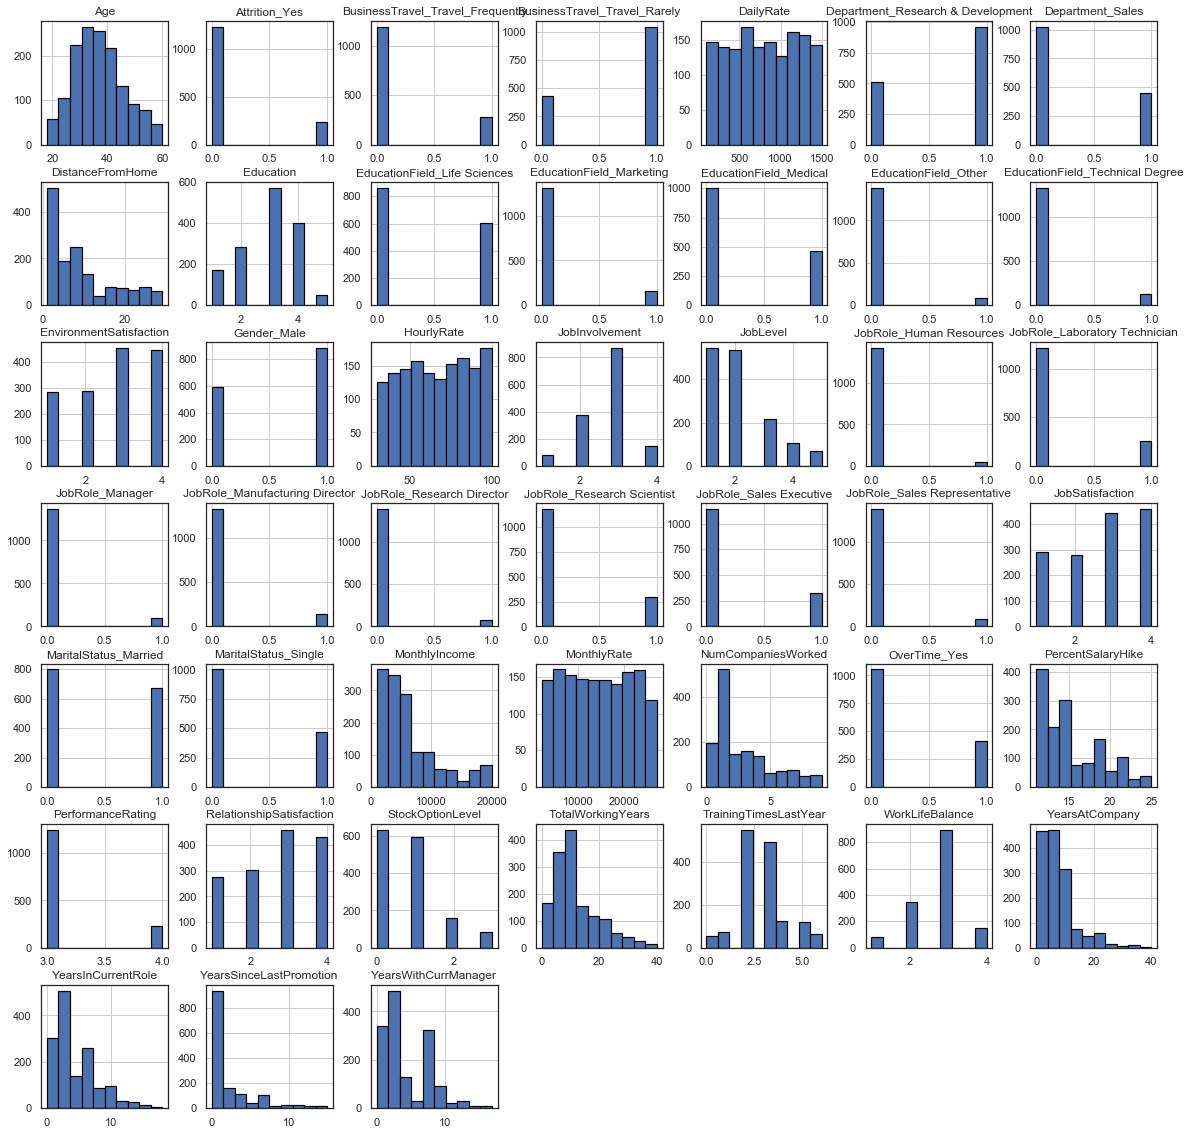

In [30]:
#check the distribution for each column 
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

# split the data to train and test datasets 

In [31]:
# split train and test datasets

# since we have imbalanced data we will use stratified sampling 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Attrition_Yes'],axis=1), 
                                                    df['Attrition_Yes'], 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                   stratify=df['Attrition_Yes'],
                                                    shuffle=True)

print("Train")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts(normalize=False))
print("====")
print("Test")
print(y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=False))

Train
0    0.838435
1    0.161565
Name: Attrition_Yes, dtype: float64
0    986
1    190
Name: Attrition_Yes, dtype: int64
====
Test
0    0.840136
1    0.159864
Name: Attrition_Yes, dtype: float64
0    247
1     47
Name: Attrition_Yes, dtype: int64


# Model1:  Building a Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression
import time

logmodel = LogisticRegression()

start = time.time()

logmodel.fit(X_train,y_train)

end = time.time()
elapsed_time_logmodel = end - start


elapsed_time_logmodel
print('Time')
print(round(elapsed_time_logmodel,5))


predictions = logmodel.predict(X_test)
#X_test.head()

# evaluation  using confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

print("confusion_matrix")
print(confusion_matrix(y_test,predictions))


print("Logistic Regression model")
print(classification_report(y_test,predictions))

Time
0.01902
confusion_matrix
[[245   2]
 [ 36  11]]
Logistic Regression model
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.85      0.23      0.37        47

    accuracy                           0.87       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.87      0.87      0.84       294



/Users/user/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



# Model 2: Decision Tree Classifiction

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
start = time.time()

dt_model.fit(X_train,y_train)

end = time.time()
elapsed_time_Dtree = end - start

print("Time")
print(round(elapsed_time_Dtree,5))

dt_pred = dt_model.predict(X_test)

print("confusion_matrix")
print(confusion_matrix(y_test,dt_pred))

print("Decision Tree Classifiction")
print(classification_report(y_test,dt_pred))

Time
0.0101
confusion_matrix
[[218  29]
 [ 28  19]]
Decision Tree Classifiction
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       247
           1       0.40      0.40      0.40        47

    accuracy                           0.81       294
   macro avg       0.64      0.64      0.64       294
weighted avg       0.81      0.81      0.81       294



# Model 3 : Random Forest Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier


rf= RandomForestClassifier(n_estimators=500)
start = time.time()

rf.fit(X_train,y_train)

end = time.time()
elapsed_time_rf = end - start


print("Time")
print(round(elapsed_time_rf,5))

rf_pre=rf.predict(X_test)
      
print("confusion_matrix")
print(confusion_matrix(y_test,rf_pre))

print("Random Forest Classification")
print(classification_report(y_test,rf_pre))

Time
0.77585
confusion_matrix
[[246   1]
 [ 43   4]]
Random Forest Classification
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.80      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.83      0.54      0.54       294
weighted avg       0.84      0.85      0.80       294



# Model 4: XGBoosts Classifier

Time
confusion_matrix
[[235  12]
 [ 26  21]]
XGBoosts Classifier
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       247
           1       0.64      0.45      0.52        47

    accuracy                           0.87       294
   macro avg       0.77      0.70      0.73       294
weighted avg       0.86      0.87      0.86       294



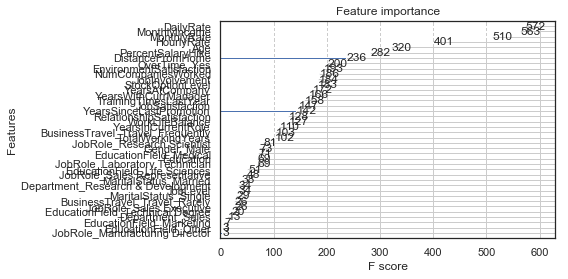

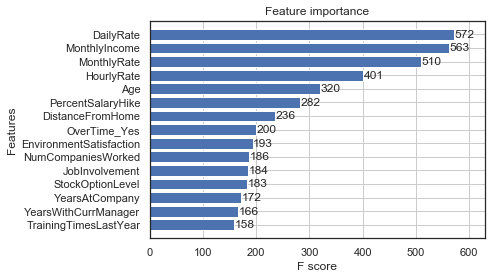

In [42]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
start = time.time()


xgboost.fit(X_train,y_train)

end = time.time()
elapsed_time_xgb = end - start



print("Time")
round(elapsed_time_xgb,5)

xg_pred = xgboost.predict(X_test)

print("confusion_matrix")
print(confusion_matrix(y_test,xg_pred))

print("XGBoosts Classifier")
print(classification_report(y_test,xg_pred))


# plot feature importance
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgboost)
pyplot.show()

plot_importance(xgboost, max_num_features=15, height=0.8)
plt.show()

 number of columns previously  45
 number of columns now  16
[[236  11]
 [ 32  15]]
XGBoosts Classifier Top features only
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



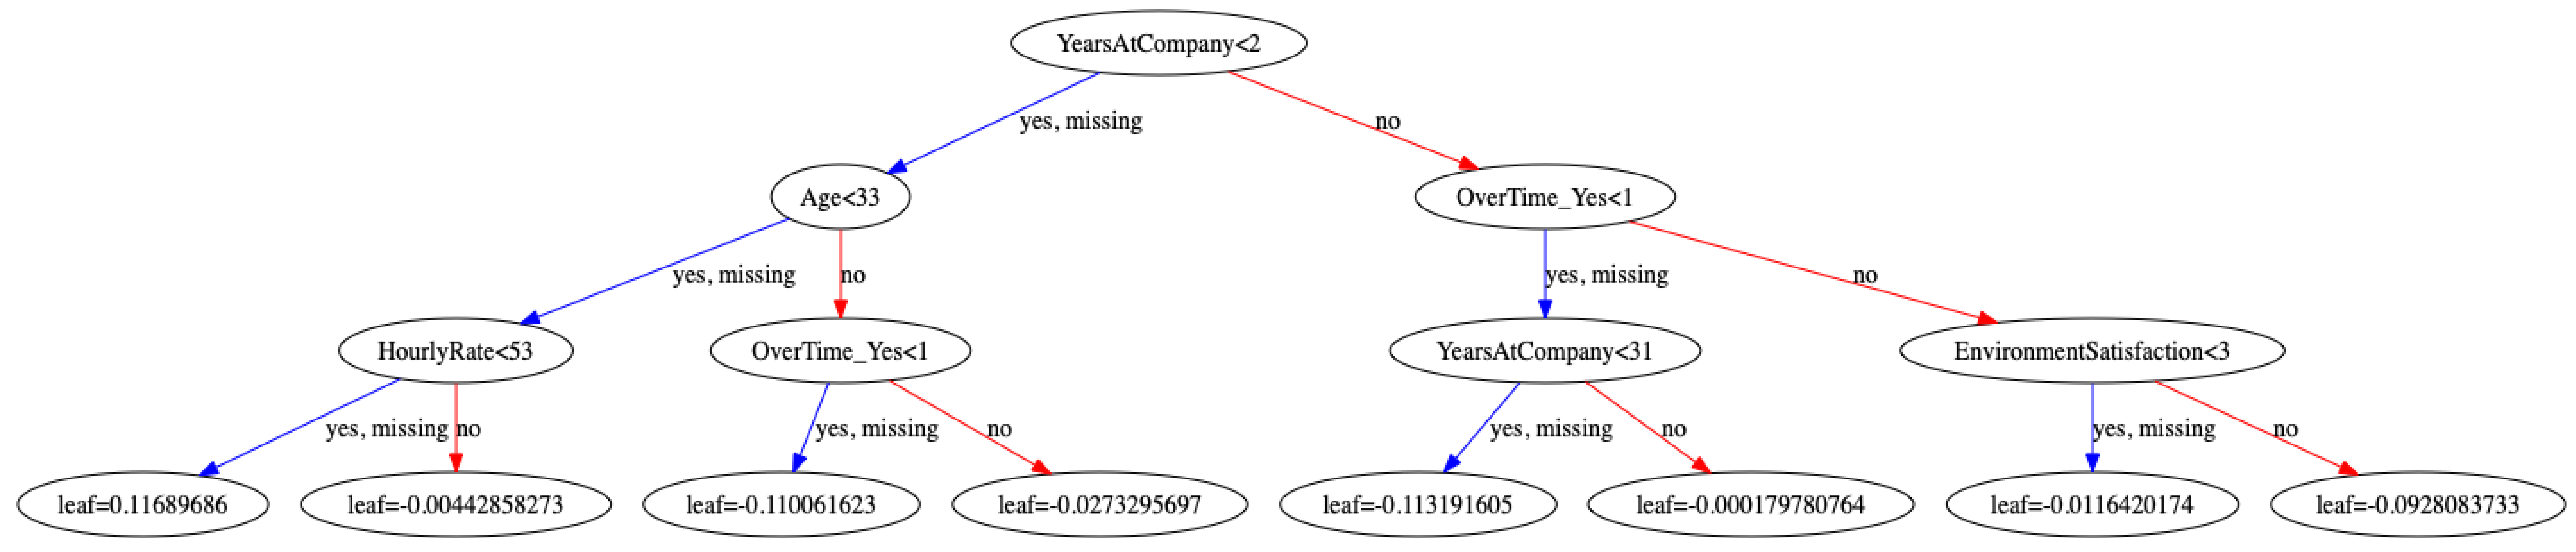

In [45]:
## now we will rerun the model with the top important features only and visluze it 


#create the new data set with the top features only 
test=df[['DailyRate','MonthlyIncome','MonthlyRate','HourlyRate', 'Age',
    'PercentSalaryHike','DistanceFromHome','OverTime_Yes', 'EnvironmentSatisfaction',
    'NumCompaniesWorked','JobInvolvement','StockOptionLevel',
    'YearsAtCompany','YearsWithCurrManager','TrainingTimesLastYear','Attrition_Yes']]
    


print( " number of columns previously " ,len(df.columns))
print( " number of columns now " ,len(test.columns))



# split the data to test and train using stratifed sampling
# split train and test datasets

# since we have imbalanced data we will use stratified sampling 
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(test.drop(['Attrition_Yes'],axis=1), 
                                                    test['Attrition_Yes'], 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                   stratify=test['Attrition_Yes'],
                                                    shuffle=True)

from xgboost import XGBClassifier
xgboost_2 = XGBClassifier(n_estimators=1000)
xgboost_2.fit(X_train_2,y_train_2)

xg_pred_2 = xgboost_2.predict(X_test_2)
print(confusion_matrix(y_test_2,xg_pred_2))

print("XGBoosts Classifier Top features only")
print(classification_report(y_test_2,xg_pred_2))


#conda install -c conda-forge python-graphviz

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt


# load data
dataset = test
# split data into X and y
X = X_train_2
y = y_train_2
# fit model no training data
model = XGBClassifier()
start = time.time()
model.fit(X, y)
end = time.time()
elapsed_time = end - start
# plot single tree

import matplotlib as plt 
plot_tree(model, num_trees=5)
fig = plt.pyplot.gcf()
fig.set_size_inches(150, 100)
#fig.savefig('tree22.png')

In [46]:
print(elapsed_time_logmodel)
print(elapsed_time_Dtree)
print(elapsed_time_rf)
print(elapsed_time_xgb)

0.019024133682250977
0.010098934173583984
0.7758502960205078
2.150723934173584


# next steps 

* Try down sampling and check the changes that happens in each model
* Try using set seed to reduce randmization 
